# Stroke Prediction Project
## 1. Problem Definition: 
- Goal: predict whether a patient is likely to get stroke
## 2. Feature Selection:
-  Choose feature to train ML model
- Need to use  'Feature Engineering' to identify Feature needed
## 3. Splitting datasets
- data: dataset
- x: data[feature]
- y: target variable Stroke

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mydef

In [3]:
path ='./data/healthcare-dataset-stroke-data.csv'
raw_df = pd.read_csv(path)

In [4]:
df = raw_df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
move_df = df['age']
df = df.drop(['age'],axis =1)
df.insert(9, 'age', move_df)

In [6]:
id_df = df['id'] 
df = df.drop(['id'], axis= 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   age                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
mydef.find_percent_missing_data(df)

gender: 0.0% 
hypertension: 0.0% 
heart_disease: 0.0% 
ever_married: 0.0% 
work_type: 0.0% 
Residence_type: 0.0% 
avg_glucose_level: 0.0% 
bmi: 3.9334637964774952% 
age: 0.0% 
smoking_status: 0.0% 
stroke: 0.0% 


In [9]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')

In [10]:
filled_bmi = impute.fit_transform(df.iloc[:, 7:8].values)
filled_bmi

array([[36.6       ],
       [28.89323691],
       [32.5       ],
       ...,
       [30.6       ],
       [25.6       ],
       [26.2       ]])

In [11]:
df['bmi'] = pd.DataFrame(filled_bmi)
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

# Feature Engineering

In [12]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,age,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,67.0,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,61.0,never smoked,1
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,80.0,never smoked,1
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,49.0,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,79.0,never smoked,1


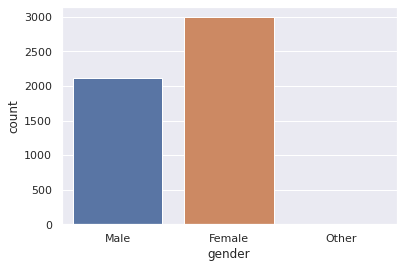

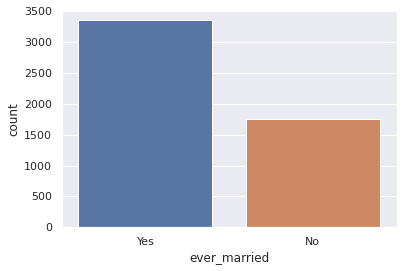

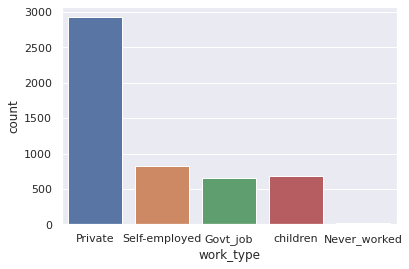

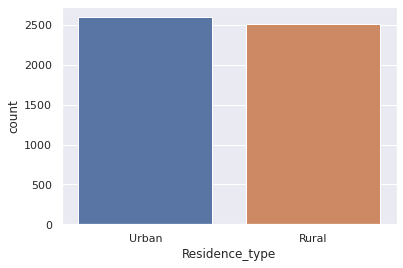

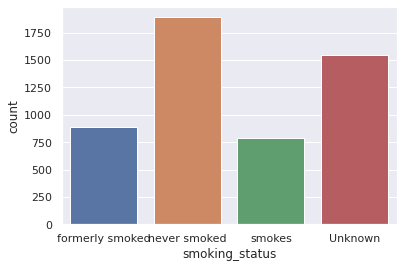

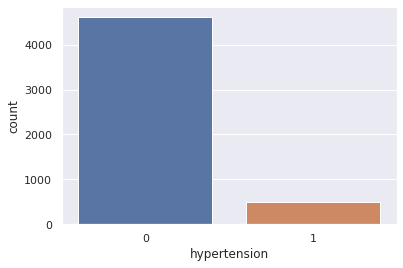

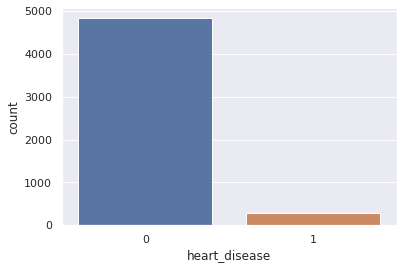

In [13]:
list_category_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease',]
for col in list_category_column:
    if col =='stroke':
        break
    plt.figure()
    sns.countplot(data =df, x=col);

In [14]:
# Drop other
list_other_index = list(df[df['gender'] == 'Other'].index)
df = df.drop([index for index in list_other_index], axis= 0)

In [15]:
df[list_category_column[0]].name

'gender'

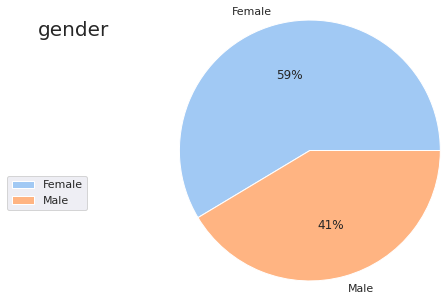

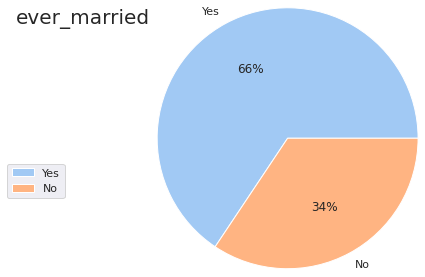

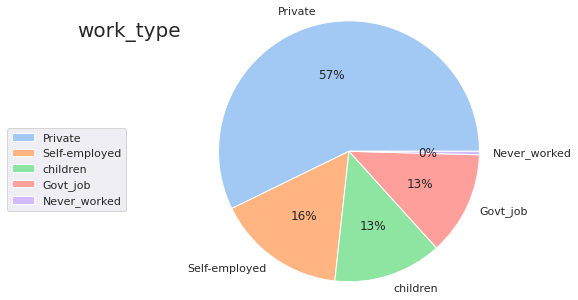

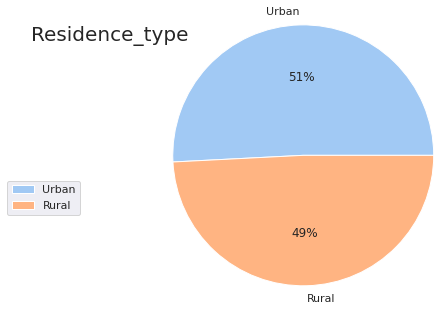

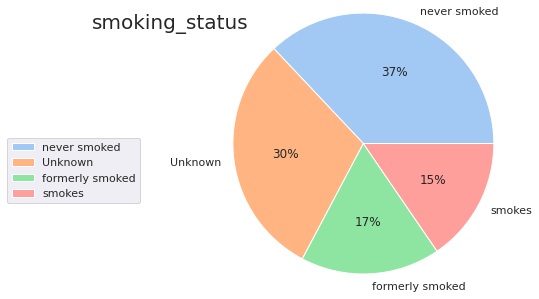

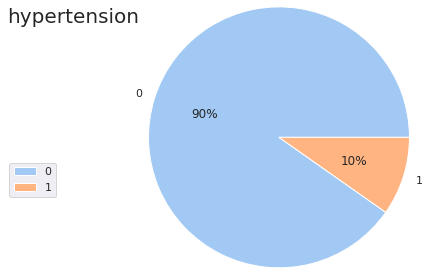

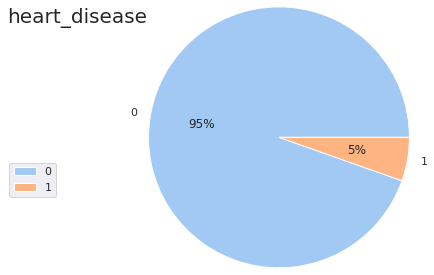

In [16]:
for col in list_category_column:
    data = df[col].value_counts()
    labels = list(data.index)
    name = df[col].name
    plt.figure()
    mydef.draw_pie(list(data.values),labels, name)

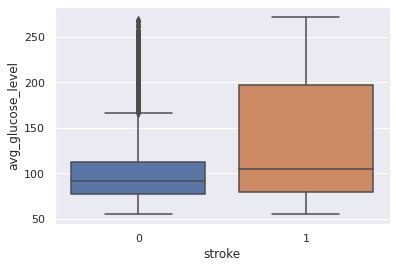

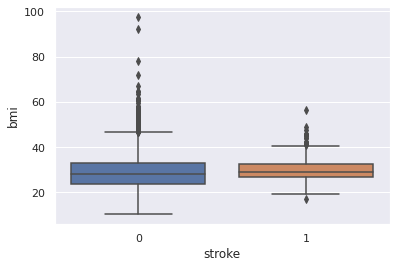

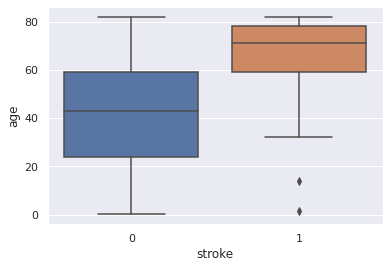

In [17]:
list_numberic_column = [ 'avg_glucose_level', 'bmi', 'age']
for col in list_numberic_column:
    plt.figure()
    sns.boxplot(data =df, x = 'stroke', y =col );

<Figure size 432x288 with 0 Axes>

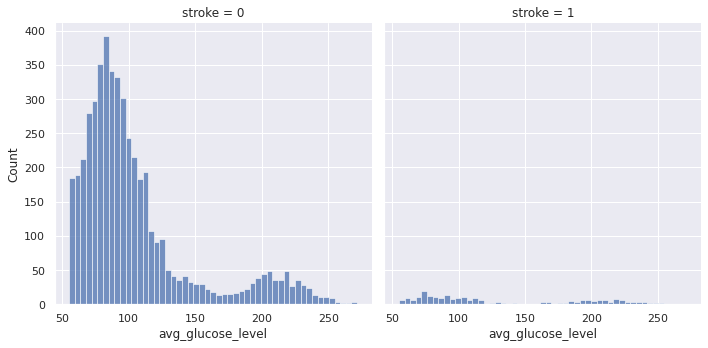

<Figure size 432x288 with 0 Axes>

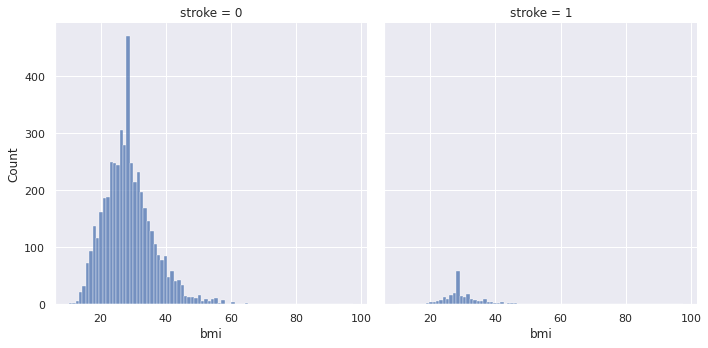

<Figure size 432x288 with 0 Axes>

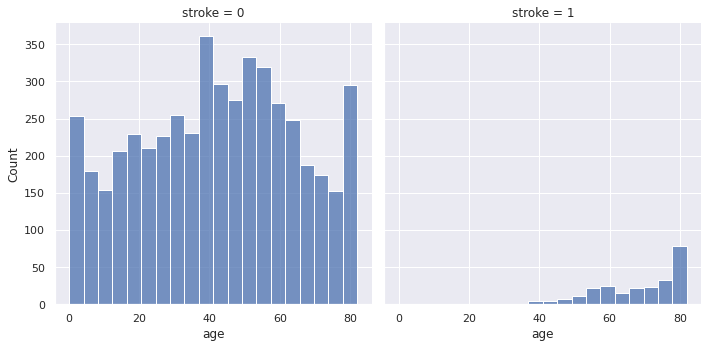

In [18]:
for col in list_numberic_column:
    plt.figure();
    sns.displot(data =df, x = col, col ='stroke');

In [19]:
# sns.pairplot(data =df[list_numberic_column]);

### data Bias

In [20]:
x = df.iloc[ : , 0:-1].values
y =df.iloc[:, -1].values

In [21]:
x

array([['Male', 0, 1, ..., 36.6, 67.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 28.893236911794666, 61.0, 'never smoked'],
       ['Male', 0, 1, ..., 32.5, 80.0, 'never smoked'],
       ...,
       ['Female', 0, 0, ..., 30.6, 35.0, 'never smoked'],
       ['Male', 0, 0, ..., 25.6, 51.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 26.2, 44.0, 'Unknown']], dtype=object)

In [22]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
# bmi index = 7
x[:, 7:8]

array([[36.6],
       [28.893236911794666],
       [32.5],
       ...,
       [30.6],
       [25.6],
       [26.2]], dtype=object)

In [24]:
x[:, 7:8]= impute.fit_transform(x[:, 7:8])
x

array([['Male', 0, 1, ..., 36.6, 67.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 28.893236911794666, 61.0, 'never smoked'],
       ['Male', 0, 1, ..., 32.5, 80.0, 'never smoked'],
       ...,
       ['Female', 0, 0, ..., 30.6, 35.0, 'never smoked'],
       ['Male', 0, 0, ..., 25.6, 51.0, 'formerly smoked'],
       ['Female', 0, 0, ..., 26.2, 44.0, 'Unknown']], dtype=object)

# Encode Categorical Data
## 1: Encode  Independent variable (X)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   hypertension       5109 non-null   int64  
 2   heart_disease      5109 non-null   int64  
 3   ever_married       5109 non-null   object 
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   age                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# 0, 4, 5, 6, 9 is column index of gender, ever_married, work_type, Residence_type, smoking_status
list_column_index = [0, 3, 4, 5, 9]

gender = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [col for col in list_column_index] )], remainder = "passthrough")
x = (gender.fit_transform(x))

In [27]:
x[0]

array([0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
       0.0, 0.0, 0, 1, 228.69, 36.6, 67.0], dtype=object)

## 2: Encode Dependent Variable (y)

In [28]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## Splitting the dataset (x =data, y = output) into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# 80 % train and 20 % test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2 )

# Using SMOTE to balance the Data


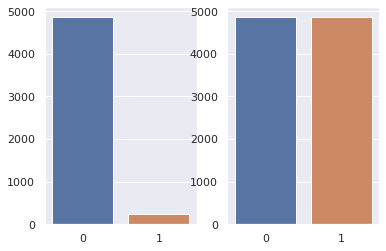

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1);

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x, y = sm.fit_resample(x, y)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2);

In [58]:
x[0]

array([  0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
         1.  , 228.69,  36.6 ,  67.  ])

## Feature Scaling by StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler

x_train[: , 18:] = StandardScaler().fit_transform(x_train[: , 18:])
x_train

array([[0.0, 1.0, 0.0, ..., 112.64, -0.05279848857098958,
        1.5885939883285147],
       [1.0, 0.0, 0.0, ..., 88.32, 0.9535332596767244,
        0.8368806323539311],
       [1.0, 0.0, 1.0, ..., 59.52, 0.6180893435941537,
        -0.9760751085259469],
       ...,
       [1.0, 0.0, 1.0, ..., 97.28, -1.433279220141572,
        -1.8533688133809905],
       [1.0, 0.0, 0.0, ..., 93.93, -0.9559167241779127,
        -0.22436175255136337],
       [1.0, 0.0, 0.0, ..., 100.15, 2.7597697308905706,
        0.12938570908373476]], dtype=object)

In [60]:
x_test[: , 18:] = StandardScaler().fit_transform(x_test[: , 18:])
x_test

array([[0.0, 1.0, 1.0, ..., 64.85, -0.7801963390513734,
        -0.5691135900232059],
       [0.0, 1.0, 0.0, ..., 65.29, -0.07160825104141776,
        -0.17063703553250414],
       [0.0, 1.0, 0.0, ..., 111.04, 0.15567472058441695,
        0.36066503712176484],
       ...,
       [0.0, 1.0, 0.0, ..., 67.92, 0.3027401728128985,
        0.36066503712176484],
       [1.0, 0.0, 1.0, ..., 128.63, -0.5261741942930876,
        0.5377657280065212],
       [0.0, 1.0, 0.0, ..., 106.41, -0.20530411670367352,
        1.511819527872681]], dtype=object)